# CNNs Autoencoder

Since an autoencoder is just a way of training a DNN we can use the convolutional and maxpooling layers of a standard DNN. Moreover it may be a good idea since our data are images!

The same encoder and decoder layers will be present, only we will not have a `Dense` layer but `Conv2D` and `MaxPooling2D` for the encoder and `UpSampling2D` for the decoder.

![](img/autoencoder_schema.jpg)

**Standard CNN**
![](img/9-cnnarch.png)

`Warning: since the dataset is quite easy there will not be major loss differences`

In [2]:
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt

Let's create the Model.

First: the **input** is now different! It is a 2D array!

In [3]:
input_img = Input(shape=(28, 28, 1))  

**Encoder**

We go down from 28x28 (784) to 8 4x4 (128) dimensions.
Padding is used to around the image.

![](img/cnn-connections.png)

**Conv2D:**
* `filters`:  dimensionality of the output space (i.e. the number output of filters in the convolution).
* `kernel_size`: width and height of the 2D convolution window

**MaxPooling2D:**
* `pool_size`:  factors by which to downscale (vertical, horizontal). (2, 2) will halve the input in both spatial dimension

**UpSampling2D:**
* `size`:   The upsampling factors for rows and columns.


In [4]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

Dimensionaly reduction is perfomed by `MaxPooling2D`. 

Considering only one dimension: 28 -> 14 -> 7 -> 4

The **code** representation is (4, 4, 8) i.e. 128-dimensional

**Decoder**

We go back up to the 28x28 images

In [5]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

Create the model and compile it

In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Data must have a different shape!**

In [7]:
from tensorflow.keras.datasets import mnist

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Training time!
(and you will find out CNN are slow!)

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
235/235 [==============================] - 4s 16ms/step - loss: 0.2767 - val_loss: 0.1603
Epoch 2/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1479 - val_loss: 0.1380
Epoch 3/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1335 - val_loss: 0.1290
Epoch 4/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1266 - val_loss: 0.1226
Epoch 5/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1220 - val_loss: 0.1190
Epoch 6/30
235/235 [==============================] - 3s 15ms/step - loss: 0.1186 - val_loss: 0.1162
Epoch 7/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1161 - val_loss: 0.1138
Epoch 8/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1141 - val_loss: 0.1119
Epoch 9/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1124 - val_loss: 0.1105
Epoch 10/30
235/235 [==============================] - 3s 14ms/step - loss: 0.1110 - val_lo

To use the model we can use `predict` on the `autoencoder` fitted Model

In [9]:
decoded_imgs = autoencoder.predict(x_test)

And now plot the results with the same code

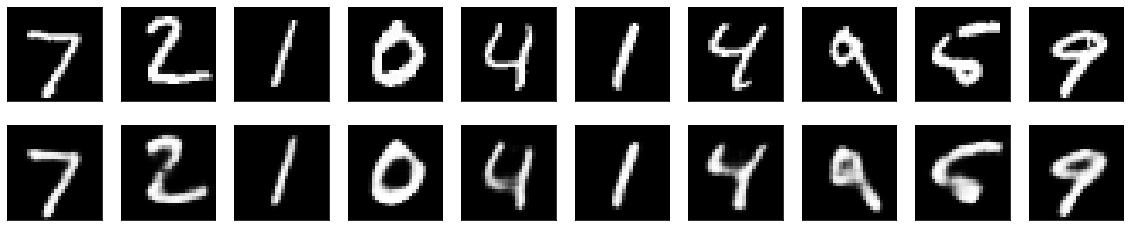

In [10]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()